In [ ]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
pip install pandas plotly


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Capturing live data for the stock market analysis and prediction
import requests
import pandas as pd
import joblib

In [ ]:
#Generated using the website of Alpha Vantage
api_key = 'AFSJSNAHVK8EB9B5'

# Define the Alpha Vantage API endpoint
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&apikey={api_key}&datatype=json&outputsize=full'

# Send a GET request to the API
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    data = response.json()

    # Extract the daily time series data
    daily_data = data['Time Series (Daily)']

    # Convert the daily data to a DataFrame
    df = pd.DataFrame.from_dict(daily_data, orient='index')
    df.index = pd.to_datetime(df.index)  # Convert the index to datetime format
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']  # Rename columns
    df = df.apply(pd.to_numeric)  # Convert all columns to numeric

    print(df)
else:
    print(f"Error: {response.status_code}")


              Open      High     Low   Close    Volume
2023-10-31  169.35  170.9000  167.90  170.77  44846017
2023-10-30  169.02  171.1700  168.87  170.29  51130955
2023-10-27  166.91  168.9600  166.83  168.22  58499129
2023-10-26  170.37  171.3775  165.67  166.89  70625258
2023-10-25  171.88  173.0600  170.65  171.10  57156962
...            ...       ...     ...     ...       ...
1999-11-05   84.62   88.3700   84.00   88.31   3721500
1999-11-04   82.06   85.3700   80.62   83.62   3384700
1999-11-03   81.62   83.2500   81.00   81.50   2932700
1999-11-02   78.00   81.6900   77.31   80.25   3564600
1999-11-01   80.00   80.6900   77.37   77.62   2487300

[6039 rows x 5 columns]


In [ ]:
df.to_csv('stock_data.csv')

In [ ]:
df.head()

,Open,High,Low,Close,Volume
2023-10-31,169.35,170.9000,167.90,170.77,44846017
2023-10-30,169.02,171.1700,168.87,170.29,51130955
2023-10-27,166.91,168.9600,166.83,168.22,58499129
2023-10-26,170.37,171.3775,165.67,166.89,70625258
2023-10-25,171.88,173.0600,170.65,171.10,57156962


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,6039.000000,6039.000000,6039.00000,6039.000000,6.039000e+03
mean,173.269598,175.202274,171.23073,173.273540,3.209761e+07
std,149.929532,151.166797,148.48915,149.863968,3.012789e+07
min,12.990000,13.190000,12.72000,13.120000,7.025000e+05
25%,72.680000,73.670000,71.47000,72.510000,1.149885e+07
50%,133.450000,135.120000,131.44000,133.410000,2.352420e+07
75%,199.580000,201.605000,197.93000,199.815000,4.196990e+07
max,702.410000,705.070000,699.57000,702.100000,3.326072e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6039 entries, 2023-10-31 to 1999-11-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6039 non-null   float64
 1   High    6039 non-null   float64
 2   Low     6039 non-null   float64
 3   Close   6039 non-null   float64
 4   Volume  6039 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 283.1 KB


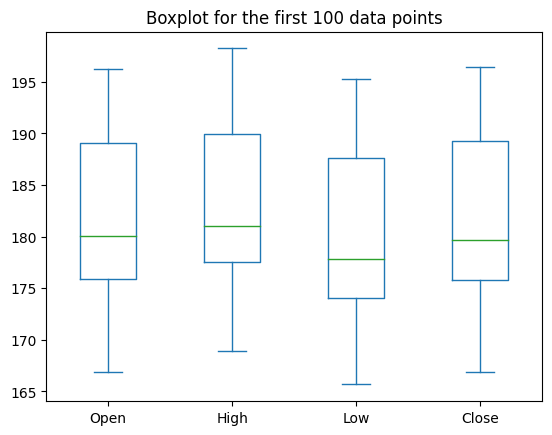

In [ ]:
#select the first 100 rows
subset = df[['Open', 'High', 'Low', 'Close']].head(100)

subset.plot(kind='box')
plt.title("Boxplot for the first 100 data points")
plt.show()


In [ ]:
#Data preprocessing
null_summary = df.isnull().sum()
print(null_summary)

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [ ]:
#Add the day of week column in the dataset
df['Day_of_Week'] = df.index.dayofweek
df['Date']=df.index



In [ ]:
df.tail(5)

,Open,High,Low,Close,Volume,Day_of_Week,Date,Open_Lag1,High_Lag1,Low_Lag1,Close_Lag1,Volume_Lag1,Close_SMA,Close_EMA,Price_Spread,Price_Range_Percentage,Daily_Return,Close_diff
2023-10-25,171.88,173.0600,170.65,-0.014505,0.831835,2,2023-10-25,173.05,173.6700,171.45,173.44,43816644.0,172.513333,172.353172,2.4100,1.408533,-1.349170,0.0
2023-10-26,170.37,171.3775,165.67,-0.042599,1.278909,3,2023-10-26,171.88,173.0600,170.65,171.10,57156962.0,170.476667,169.621586,5.7075,3.419917,-2.460549,0.0
2023-10-27,166.91,168.9600,166.83,-0.033724,0.876387,4,2023-10-27,170.37,171.3775,165.67,166.89,70625258.0,168.736667,168.920793,2.1300,1.266199,0.796932,0.0
2023-10-30,169.02,171.1700,168.87,-0.019910,0.631804,0,2023-10-30,166.91,168.9600,166.83,168.22,58499129.0,168.466667,169.605397,2.3000,1.350637,1.230531,0.0
2023-10-31,169.35,170.9000,167.90,-0.016707,0.423178,1,2023-10-31,169.02,171.1700,168.87,170.29,51130955.0,169.760000,170.187698,3.0000,1.756749,0.281872,0.0


DATA VISUALIZATION

<Axes: >

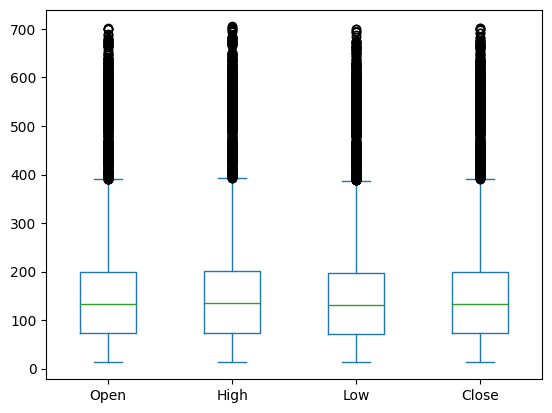

In [ ]:
import matplotlib.pyplot as plt
df[['Open','High','Low','Close']].plot(kind='box')

LINE PLOT FOR OPEN CLOSE LOW HIGH VS DATE

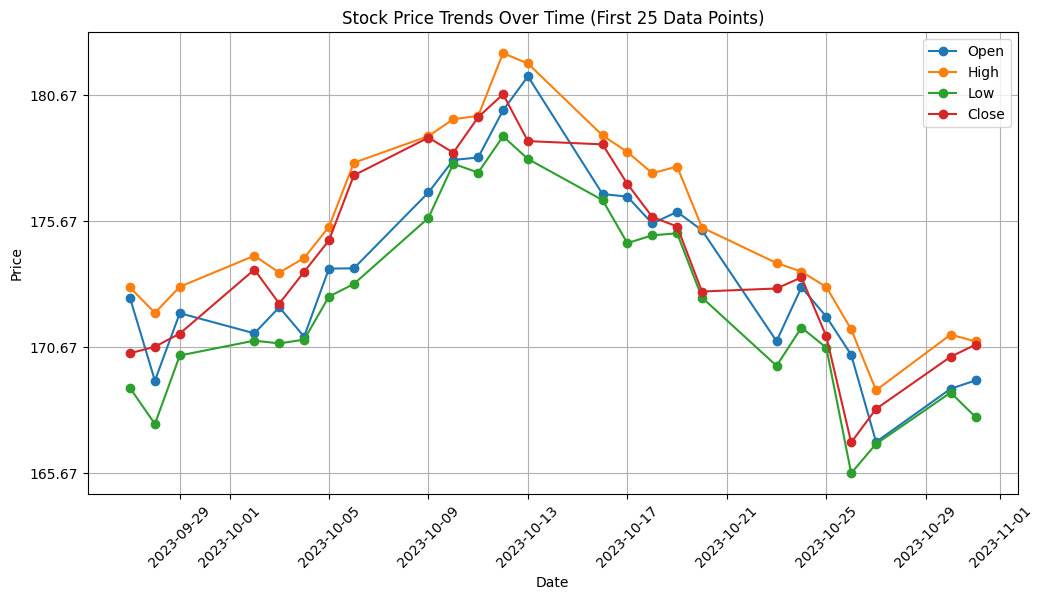

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Subset the data to take only 25 data points
subset_df = df.head(25)

# Extract data for plotting
dates = subset_df['Date']
open_prices = subset_df['Open']
high_prices = subset_df['High']
low_prices = subset_df['Low']
close_prices = subset_df['Close']

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(dates, open_prices, label='Open', marker='o')
plt.plot(dates, high_prices, label='High', marker='o')
plt.plot(dates, low_prices, label='Low', marker='o')
plt.plot(dates, close_prices, label='Close', marker='o')

plt.title('Stock Price Trends Over Time (First 25 Data Points)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Improve y-axis labels
plt.yticks(np.arange(min(subset_df['Low']), max(subset_df['High']) + 1, 5))  # Adjust the interval as needed

plt.show()


CANDLESTICK PLOT

In [ ]:
import plotly.graph_objects as go
# Sort the DataFrame by date
df = df.sort_values(by='Date')
# Filter the data for the recent one year
one_year_data = df[df['Date'] >= pd.to_datetime('2023-9-26')]
fig = go.Figure(data=[go.Candlestick(x=['Date'],
                open=one_year_data['Open'],
                high=one_year_data['High'],
                low=one_year_data['Low'],
                close=one_year_data['Close'])])

fig.update_layout(
    title='Candlestick Chart for the Last One Month',
    xaxis_title='Date',
    yaxis_title='Price',
)

fig.show()



Bar Chart

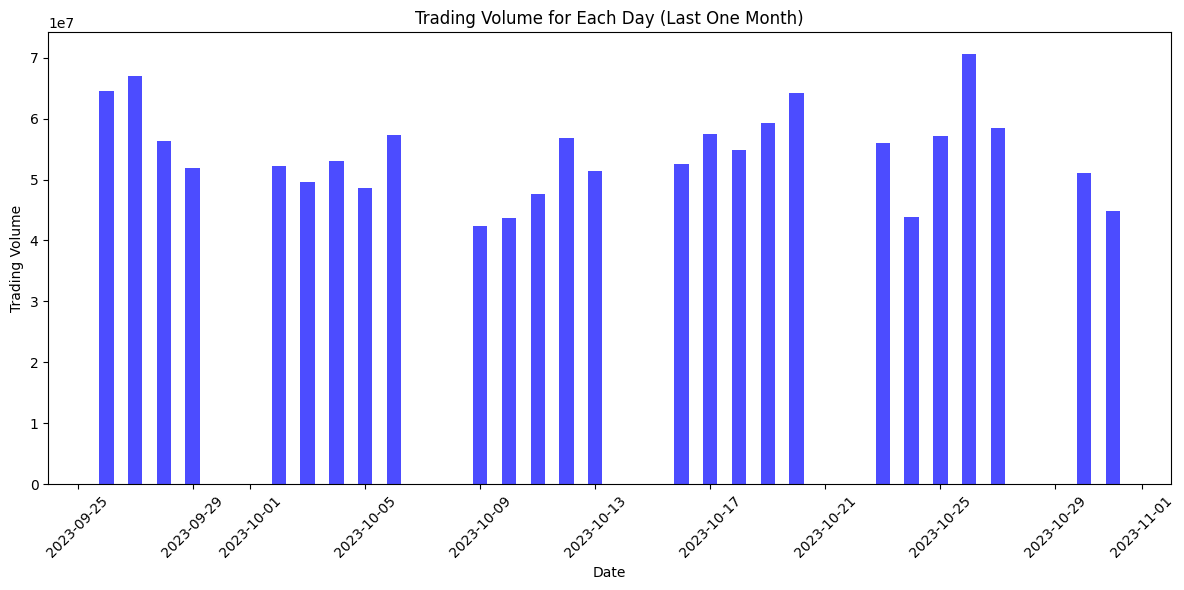

In [ ]:
 import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for the last one year
one_year_data = df[df['Date'] >= pd.to_datetime('2023-9-26')]

# Create a bar chart for trading volume
plt.figure(figsize=(12, 6))
plt.bar(one_year_data['Date'], one_year_data['Volume'], width=0.5, color='blue', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Trading Volume for Each Day (Last One Month)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure the labels and title are displayed properly

plt.show()


OHLC CHART

In [ ]:
import pandas as pd
import plotly.graph_objects as go
# Filter the data for the last one year
one_year_data = df[df['Date'] >= pd.to_datetime('2023-9-26')]
# Create an OHLC chart
fig = go.Figure(data=go.Ohlc(x=one_year_data['Date'],
                             open=one_year_data['Open'],
                             high=one_year_data['High'],
                             low=one_year_data['Low'],
                             close=one_year_data['Close']))

fig.update_layout(
    title='OHLC Chart for the Last One Month',
    xaxis_title='Date',
    yaxis_title='Price',
)

fig.show()


WEEKLY BAR PLOT

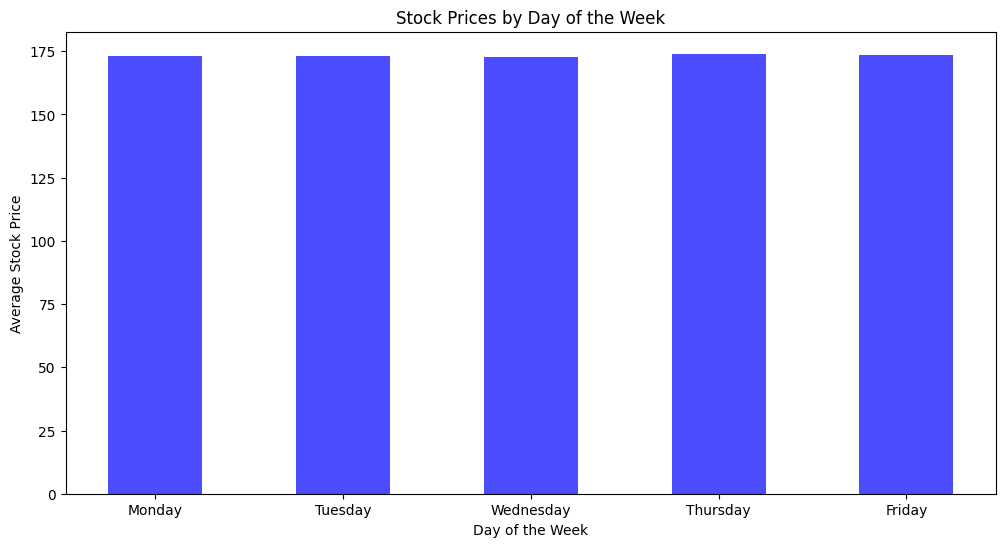

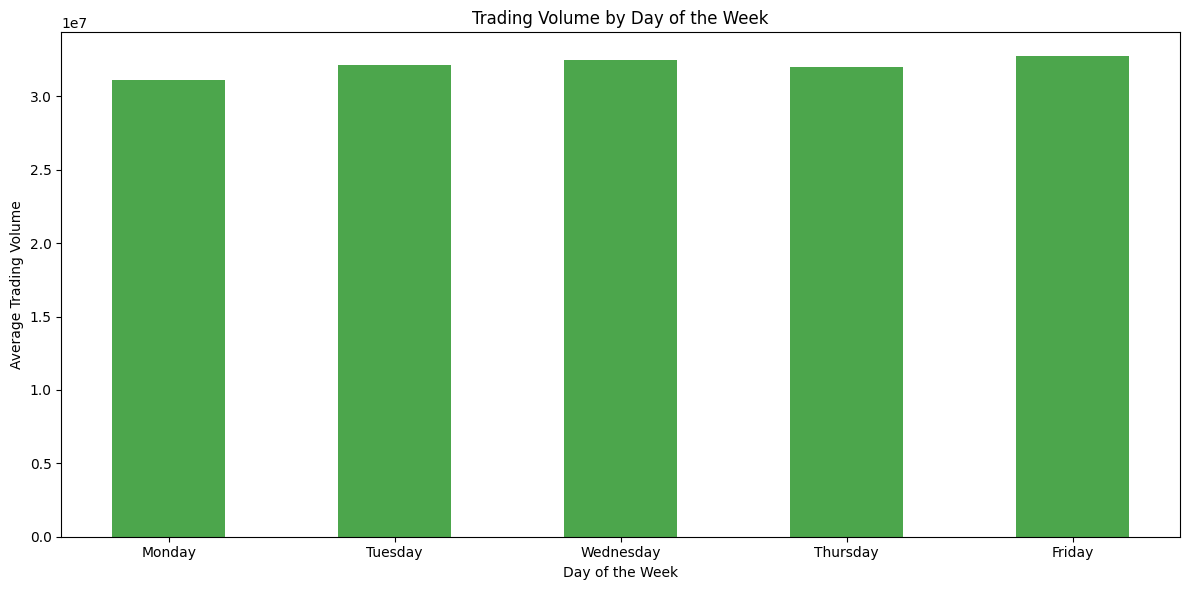

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by day of the week and calculate the mean of 'Close' and 'Volume'
# Replace 'df' with the actual name of your DataFrame
weekly_data = df.groupby('Day_of_Week').agg({'Close': 'mean', 'Volume': 'mean'}).reset_index()

# Define the days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Create a bar chart for stock prices by day of the week
plt.figure(figsize=(12, 6))
plt.bar(weekly_data['Day_of_Week'].apply(lambda x: days[x]), weekly_data['Close'], width=0.5, color='blue', alpha=0.7)
plt.xlabel('Day of the Week')
plt.ylabel('Average Stock Price')
plt.title('Stock Prices by Day of the Week')

# Create a bar chart for trading volume by day of the week
plt.figure(figsize=(12, 6))
plt.bar(weekly_data['Day_of_Week'].apply(lambda x: days[x]), weekly_data['Volume'], width=0.5, color='green', alpha=0.7)
plt.xlabel('Day of the Week')
plt.ylabel('Average Trading Volume')
plt.title('Trading Volume by Day of the Week')

plt.tight_layout()  # Ensure labels and titles are displayed properly

plt.show()


LINE PLOT

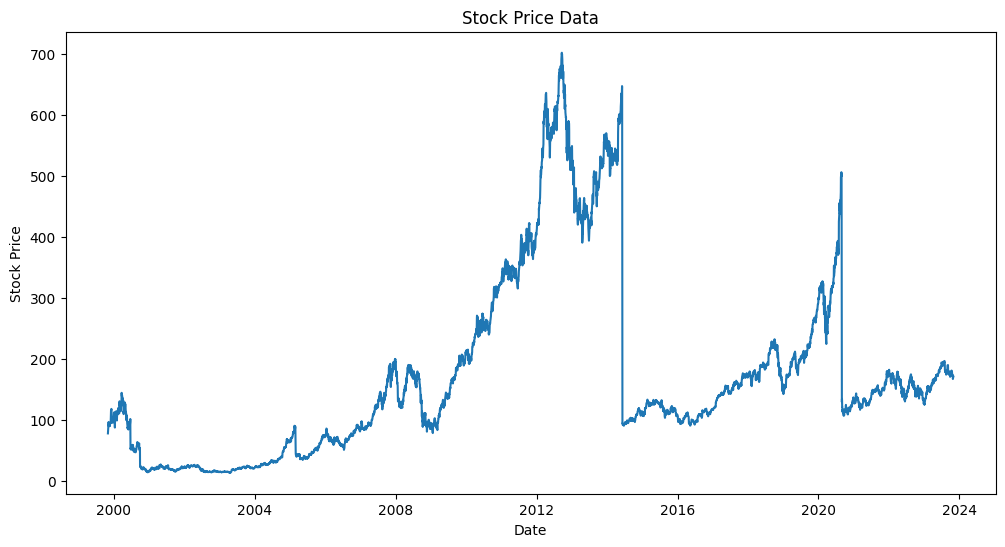

In [ ]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()


In [ ]:
#Feature engineering is a crucial step in preparing your data for stock market analysis and prediction.
#It involves creating new features (variables) from the existing data that can help improve
#the performance of your predictive models.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 1. Lag Features (Example: Lag of 1 day)
#Create lag features for 'Open,' 'High,' 'Low,' 'Close,' and 'Volume.'
#Lag features are previous values of these variables and can capture temporal patterns in the data.
df['Open_Lag1'] = df['Open'].shift(1)
df['High_Lag1'] = df['High'].shift(1)
df['Low_Lag1'] = df['Low'].shift(1)
df['Close_Lag1'] = df['Close'].shift(1)
df['Volume_Lag1'] = df['Volume'].shift(1)

In [ ]:
# 2. Moving Averages
#Calculating a moving average in a dataset involves taking the average of a subset of data points as you move through the dataset.
#This moving average is often used to smooth out fluctuations in the data and identify trends or patterns.
window = 3
# Calculate SMA with available data and fill the initial NaN values with the mean of the available 'Close' values
df['Close_SMA'] = pd.to_numeric(df['Close']).rolling(window=window).mean()

In [ ]:
#Calculate the exponential moving average
window=3
# Calculate the 3-day EMA for the selected column
df['Close_EMA']= df['Close'].ewm(span=window, adjust=False).mean()

In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.3-py3-none-any.whl size=29201 sha256=3259b342637837d2775429b32a87aebc261027e454cd7a12a7c64707164005fc
  Stored in directory: /root/.cache/pip/wheels/8c/3e/da/ffa819d325eea35cf8a73e24fd2c742ccd872b142aab47dc03
Successfully built ta


In [ ]:
import ta  # Technical Analysis Library


In [ ]:
#3 Calculate Relative Strength Index (RSI)
#Calculate the RSI, which is a momentum oscillator that measures the speed and change of price movements.
#This can help in identifying overbought or oversold conditions.
#df['RSI'] = ta.momentum.RSIIndicator(df['Close']).rsi()
#this is coming as nan because of the insufficient data

In [ ]:

# Calculate Relative Strength Index (RSI) with enough data points
#df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=5).rsi()  # Using a standard 5-day window

# Calculate Moving Average Convergence Divergence (MACD) with enough data points
#df['MACD'] = ta.trend.macd(df['Close'])

# Calculate Bollinger Bands with enough data points
#df['Bollinger_Bands'] = ta.volatility.BollingerBands(df['Close']).bollinger_mavg()

# Drop rows with NaN values, especially in the beginning due to initial window periods
#data = df.dropna()

# Print the updated DataFrame with technical indicators
#print(data)


In [ ]:
import pandas as pd
# 6. Price Spread and Range
df['Price_Spread'] = pd.to_numeric(df['High']) - pd.to_numeric(df['Low'])
df['Price_Range_Percentage'] = ((pd.to_numeric(df['High']) - pd.to_numeric(df['Low']))/ pd.to_numeric(df['Close'])) * 100

In [ ]:
# 7. Daily Returns
df['Daily_Return'] = pd.to_numeric(df['Close']).pct_change() * 100

In [ ]:
# 9. Feature Scaling and Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Close', 'Volume']] = scaler.fit_transform(df[['Close', 'Volume']])


In [ ]:
# 10. Calculate Moving Average Convergence Divergence (MACD)
#df['MACD'] = ta.trend.macd(df['Close'])


In [ ]:
#11. Calculate Bollinger Bands
data['Bollinger_Bands'] = ta.volatility.BollingerBands(df['Close']).bollinger_mavg()



In [ ]:
df.head()

,Open,High,Low,Close,Volume,Day_of_Week,Date,Open_Lag1,High_Lag1,Low_Lag1,Close_Lag1,Volume_Lag1,Close_SMA,Close_EMA,Price_Spread,Price_Range_Percentage,Daily_Return
1999-11-01,80.00,80.69,77.37,-0.638322,-0.982902,0,1999-11-01,NaN,NaN,NaN,NaN,NaN,NaN,77.620000,3.32,4.277248,NaN
1999-11-02,78.00,81.69,77.31,-0.620771,-0.947142,1,1999-11-02,80.00,80.69,77.37,77.62,2487300.0,NaN,78.935000,4.38,5.457944,3.388302
1999-11-03,81.62,83.25,81.00,-0.612430,-0.968117,2,1999-11-03,78.00,81.69,77.31,80.25,3564600.0,79.790000,80.217500,2.25,2.760736,1.557632
1999-11-04,82.06,85.37,80.62,-0.598282,-0.953113,3,1999-11-04,81.62,83.25,81.00,81.50,2932700.0,81.790000,81.918750,4.75,5.680459,2.601227
1999-11-05,84.62,88.37,84.00,-0.566985,-0.941933,4,1999-11-05,82.06,85.37,80.62,83.62,3384700.0,84.476667,85.114375,4.37,4.948477,5.608706


In [ ]:
df

,Open,High,Low,Close,Volume,Day_of_Week,Date,Open_Lag1,High_Lag1,Low_Lag1,Close_Lag1,Volume_Lag1,Close_SMA,Close_EMA,Price_Spread,Price_Range_Percentage,Daily_Return
1999-11-01,80.00,80.6900,77.37,-0.638322,-0.982902,0,1999-11-01,NaN,NaN,NaN,NaN,NaN,NaN,77.620000,3.3200,4.277248,NaN
1999-11-02,78.00,81.6900,77.31,-0.620771,-0.947142,1,1999-11-02,80.00,80.6900,77.37,77.62,2487300.0,NaN,78.935000,4.3800,5.457944,3.388302
1999-11-03,81.62,83.2500,81.00,-0.612430,-0.968117,2,1999-11-03,78.00,81.6900,77.31,80.25,3564600.0,79.790000,80.217500,2.2500,2.760736,1.557632
1999-11-04,82.06,85.3700,80.62,-0.598282,-0.953113,3,1999-11-04,81.62,83.2500,81.00,81.50,2932700.0,81.790000,81.918750,4.7500,5.680459,2.601227
1999-11-05,84.62,88.3700,84.00,-0.566985,-0.941933,4,1999-11-05,82.06,85.3700,80.62,83.62,3384700.0,84.476667,85.114375,4.3700,4.948477,5.608706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,171.88,173.0600,170.65,-0.014505,0.831835,2,2023-10-25,173.05,173.6700,171.45,173.44,43816644.0,172.513333,172.353172,2.4100,1.408533,-1.349170
2023-10-26,170.37,171.3775,165.67,-0.042599,1.278909,3,2023-10-26,171.88,173.0600,170.65,171.10,57156962.0,170.476667,169.621586,5.7075,3.419917,-2.460549
2023-10-27,166.91,168.9600,166.83,-0.033724,0.876387,4,2023-10-27,170.37,171.3775,165.67,166.89,70625258.0,168.736667,168.920793,2.1300,1.266199,0.796932
2023-10-30,169.02,171.1700,168.87,-0.019910,0.631804,0,2023-10-30,166.91,168.9600,166.83,168.22,58499129.0,168.466667,169.605397,2.3000,1.350637,1.230531


In [ ]:
# Split the data into training and testing sets (e.g., 80% training, 20% testing)
import pandas as pd
from sklearn.model_selection import train_test_split
# Convert the data dictionary into a DataFrame
data = pd.DataFrame(df)

# Split the data into training and testing sets
X = data.drop(columns=['Date', 'Close'])  # Assuming you want to predict 'Close' based on other columns
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create DataFrames for the training and test data
df_X_train = pd.DataFrame(X_train, columns=df.Daily_Return)  # You can replace 'X.columns' with the actual feature names
df_X_test = pd.DataFrame(X_test, columns=df.Daily_Return)  # You can replace 'X.columns' with the actual feature names
df_y_train = pd.DataFrame({'Close': y_train})  # Assuming 'Close' is your target variable
df_y_test = pd.DataFrame({'Close': y_test})  # Assuming 'Close' is your target variable


# Display the training and test data in tabular format
# Display the training and test data in tabular format
print("Training Feature Data:")
print(df_X_train)

print("\nTesting Feature Data:")
print(df_X_test)

print("\nTraining Target Data:")
print(df_y_train)

print("\nTesting Target Data:")
print(df_y_test)


Training Feature Data:
Daily_Return   NaN        3.388302   1.557632   2.601227   5.608706  \
2004-04-20          NaN        NaN        NaN        NaN        NaN   
2017-06-13          NaN        NaN        NaN        NaN        NaN   
2015-12-21          NaN        NaN        NaN        NaN        NaN   
2003-01-23          NaN        NaN        NaN        NaN        NaN   
2018-01-17          NaN        NaN        NaN        NaN        NaN   
...                 ...        ...        ...        ...        ...   
2014-10-29          NaN        NaN        NaN        NaN        NaN   
2020-06-19          NaN        NaN        NaN        NaN        NaN   
2020-08-10          NaN        NaN        NaN        NaN        NaN   
2021-04-06          NaN        NaN        NaN        NaN        NaN   
2003-04-07          NaN        NaN        NaN        NaN        NaN   

Daily_Return   9.126939  -7.004254   2.030797   0.885827  -1.766938  ...  \
2004-04-20          NaN        NaN        NaN   

In [ ]:
null_summary_features = df.isnull().sum()

# 'null_summary' will be a Pandas Series that shows the count of null values in each column

print(null_summary_features)


Open                      0
High                      0
Low                       0
Close                     0
Volume                    0
Day_of_Week               0
Date                      0
Open_Lag1                 1
High_Lag1                 1
Low_Lag1                  1
Close_Lag1                1
Volume_Lag1               1
Close_SMA                 2
Close_EMA                 0
Price_Spread              0
Price_Range_Percentage    0
Daily_Return              1
dtype: int64


In [ ]:
df.dropna(inplace=True)  # This will remove rows with missing values in-place


In [ ]:
df['Open_Lag1'].fillna(pd.to_numeric(df['Open_Lag1']).mean(), inplace=True)  # Replace missing values in a specific column with the mean
df['High_Lag1'].fillna(pd.to_numeric(df['High_Lag1']).mean(), inplace=True)
df['Low_Lag1'].fillna(pd.to_numeric(df['Low_Lag1']).mean(), inplace=True)
df['Close_Lag1'].fillna(pd.to_numeric(df['Close_Lag1']).mean(), inplace=True)
df['Volume_Lag1'].fillna(pd.to_numeric(df['Volume_Lag1']).mean(), inplace=True)
df['Daily_Return'].fillna(pd.to_numeric(df['Daily_Return']).mean(), inplace=True)
df['Close_SMA'].fillna(pd.to_numeric(df['Close_SMA']).mean(), inplace=True)



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, jaccard_score


In [ ]:
# Create a Linear Regression model
linear_regression = LinearRegression()
#joblib.dump(model, 'model.joblib')

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)



In [ ]:
# Train the model on your training data
linear_regression.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions on the test data
y_pred = linear_regression.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



array([-0.16439015, -1.05673214,  0.03370534, ..., -0.21512122,
       -0.29453502, -0.9747219 ])

In [ ]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")



Mean Squared Error (MSE): 7.372316633138027e-05
Root Mean Squared Error (RMSE): 0.008586219559933246
R-squared (R2) Score: 0.9999209217835728


In [ ]:
joblib.dump(linear_regression, "linear_regression_model.joblib")

['linear_regression_model.joblib']

In [ ]:
#Arima model


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Check for stationarity using Augmented Dickey-Fuller Test
result = adfuller(df['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -2.5329442016438044
p-value: 0.10766299273220303
Critical Values:
	1%: -3.4314338441287298
	5%: -2.8620189599994887
	10%: -2.5670249478751526


In [ ]:
# Differencing (if needed)
d = 0  # Choose the appropriate order of differencing (d) based on the ADF test result
if result[1] > 0.05:
    df['Close_diff'] = pd.to_numeric(df['Close']) - pd.to_numeric(df['Close']).shift(d)
else:
    df['Close_diff'] = pd.to_numeric(df['Close'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:691: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning:


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1489: ValueWarning:

Matrix is singular. Using pinv.



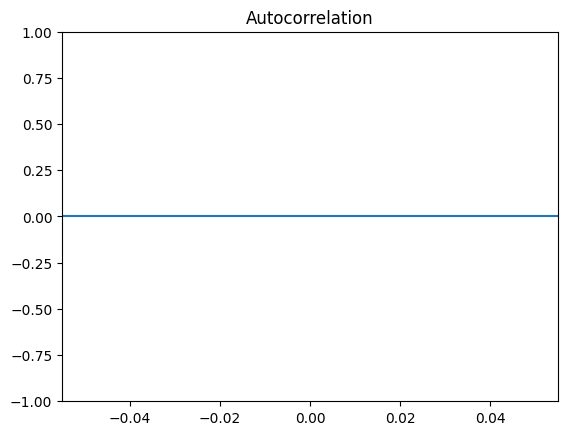

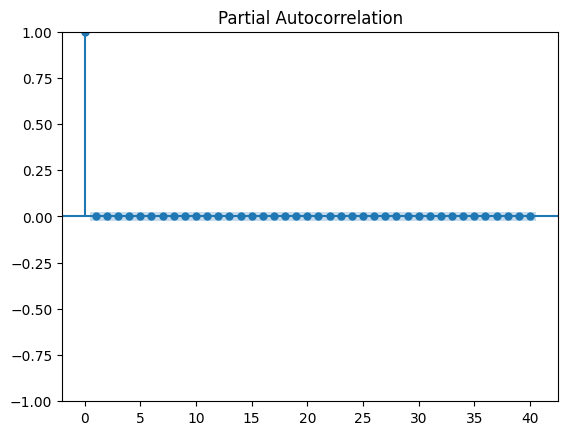

In [ ]:
# ACF and PACF plots for model parameter selection (p and q)
plot_acf(df['Close_diff'].dropna(), lags=40)
plot_pacf(df['Close_diff'].dropna(), lags=40)
plt.show()

In [ ]:

# Determine the order of the ARIMA model (p, d, q)
p = 1 # Choose the appropriate order of auto-regression (p) based on ACF plot
q = 1  # Choose the appropriate order of moving average (q) based on PACF plot
d = 1  # Choose the appropriate order of differencing (d) based on the ADF test result

In [ ]:
# Fit the ARIMA model
try:
    model = ARIMA(df['Close_diff'].dropna(), order=(p, d, q))
    results = model.fit()
except Exception as e:
    print(f"Error: ARIMA model fitting failed - {e}")
    exit()
print(results)
    # Model Summary and Diagnostics
print(results.summary())

# Make predictions
n = 30  # Number of time steps to predict
try:
    forecast = results.forecast(steps=n)
except Exception as e:
    print(f"Error: Model prediction failed - {e}")
    exit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 6037
Model:                 ARIMA(1, 1, 1)   Log Likelihood               68738.540
Date:                Wed, 01 Nov 2023   AIC                        -137471.080
Time:                        12:58:37   BIC                        -137450.963
Sample:                             0   HQIC                       -137464.096
                               - 6037                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -3.448e-10   4.72e-20  -7.31e+09      0.000   -3.45e-10   -3.45e-10
ma.L1      -3.448e-10   4.72e-20  -7.31e+09      0.000   -3.45e-10   -3.45e-10
sigma2      2.035e-11   2.46e-11      0.826      0.4

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1363: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:691: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Make predictions
n = 30  # Number of time steps to predict
try:
    forecast = results.forecast(steps=n)
except Exception as e:
    print(f"Error: Model prediction failed - {e}")
    exit()


In [ ]:
print(df.head())  # Examine the first few rows of your DataFrame

             Open   High    Low     Close    Volume  Day_of_Week       Date  \
1999-11-03  81.62  83.25  81.00 -0.612430 -0.968117            2 1999-11-03   
1999-11-04  82.06  85.37  80.62 -0.598282 -0.953113            3 1999-11-04   
1999-11-05  84.62  88.37  84.00 -0.566985 -0.941933            4 1999-11-05   
1999-11-08  87.75  97.73  86.75 -0.513198 -0.783632            0 1999-11-08   
1999-11-09  94.37  94.50  88.00 -0.558243 -0.825643            1 1999-11-09   

            Open_Lag1  High_Lag1  Low_Lag1  Close_Lag1  Volume_Lag1  \
1999-11-03      78.00      81.69     77.31       80.25    3564600.0   
1999-11-04      81.62      83.25     81.00       81.50    2932700.0   
1999-11-05      82.06      85.37     80.62       83.62    3384700.0   
1999-11-08      84.62      88.37     84.00       88.31    3721500.0   
1999-11-09      87.75      97.73     86.75       96.37    8490400.0   

            Close_SMA  Close_EMA  Price_Spread  Price_Range_Percentage  \
1999-11-03  79.790000  8

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Day_of_Week,Date,Open_Lag1,High_Lag1,Low_Lag1,Close_Lag1,Volume_Lag1,Close_SMA,Close_EMA,Price_Spread,Price_Range_Percentage,Daily_Return,Close_diff
1999-11-03,81.62,83.25,81.00,-0.612430,-0.968117,2,1999-11-03,78.00,81.69,77.31,80.25,3564600.0,79.790000,80.217500,2.25,2.760736,1.557632,0.0
1999-11-04,82.06,85.37,80.62,-0.598282,-0.953113,3,1999-11-04,81.62,83.25,81.00,81.50,2932700.0,81.790000,81.918750,4.75,5.680459,2.601227,0.0
1999-11-05,84.62,88.37,84.00,-0.566985,-0.941933,4,1999-11-05,82.06,85.37,80.62,83.62,3384700.0,84.476667,85.114375,4.37,4.948477,5.608706,0.0
1999-11-08,87.75,97.73,86.75,-0.513198,-0.783632,0,1999-11-08,84.62,88.37,84.00,88.31,3721500.0,89.433333,90.742188,10.98,11.393587,9.126939,0.0
1999-11-09,94.37,94.50,88.00,-0.558243,-0.825643,1,1999-11-09,87.75,97.73,86.75,96.37,8490400.0,91.433333,90.181094,6.50,7.252845,-7.004254,0.0


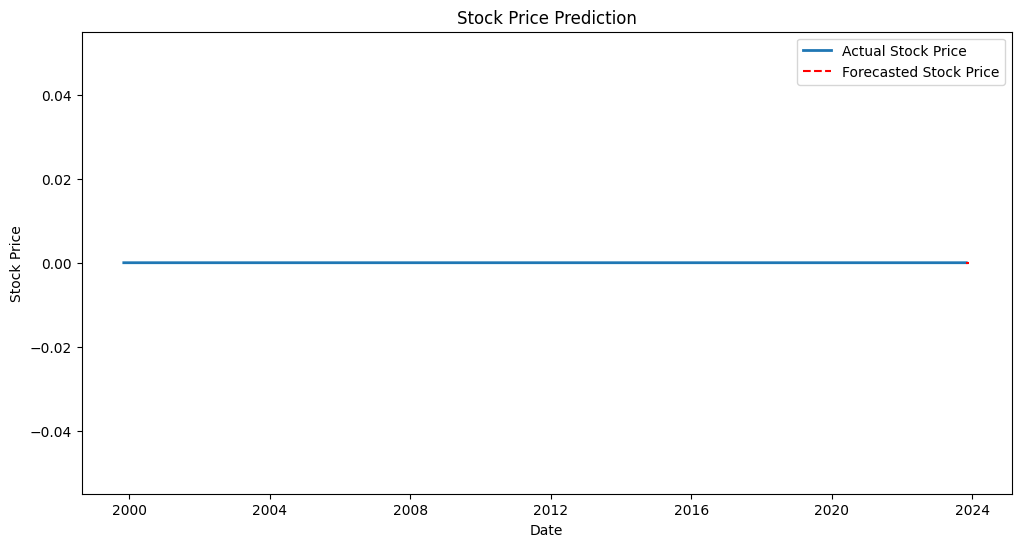

In [ ]:
import matplotlib.pyplot as plt

# Make sure 'forecast' has the correct number of elements (n elements)
n = 30  # Number of time steps to predict
forecast = results.forecast(steps=n)  # Adjust 'n' here to match the number of time steps

# Visualize the Predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close_diff'], label='Actual Stock Price', linewidth=2)

# Create a date range for the forecasted period
forecast_dates = pd.date_range(start=df.index[-1], periods= n+2, closed='right')  # Add 1 to match the number of forecasted values

# Ensure 'forecast' has the correct number of elements for plotting
forecast_values = [df['Close_diff'].iloc[-1]]+ list(forecast)  # Include the initial value


plt.plot(forecast_dates, forecast_values, label='Forecasted Stock Price', linestyle='--', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
# Calculate RMSE (Root Mean Squared Error) for model evaluation
actual = df['Close'][-n:]
rmse = sqrt(mean_squared_error(actual, forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.024005384858019053


In [ ]:
#random forest model


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


In [ ]:
rf = RandomForestRegressor()


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)  # X_train and y_train are your training data
best_rf = grid_search.best_estimator_


Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [ ]:
rf.fit(X_train, y_train)  # X_train and y_train are your training data


RandomForestRegressor()

In [ ]:
joblib.dump(rf, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [ ]:
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [ ]:
y_pred = rf.predict(X_test)  # X_test is your test data
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse
y_pred
X_train


array([[ 2.82100000e+01,  2.84100000e+01,  2.75600000e+01, ...,
         8.50000000e-01,  3.06527227e+00, -2.18694885e+00],
       [ 1.47160000e+02,  1.47450000e+02,  1.45150000e+02, ...,
         2.30000000e+00,  1.56900198e+00,  8.04566084e-01],
       [ 1.07280000e+02,  1.07370000e+02,  1.05570000e+02, ...,
         1.80000000e+00,  1.67707072e+00,  1.22606809e+00],
       ...,
       [ 4.50400000e+02,  4.55100000e+02,  4.40000000e+02, ...,
         1.51000000e+01,  3.34878357e+00,  1.45348183e+00],
       [ 1.26500000e+02,  1.27130000e+02,  1.25650000e+02, ...,
         1.48000000e+00,  1.17264876e+00,  2.46227164e-01],
       [ 1.48500000e+01,  1.49500000e+01,  1.44100000e+01, ...,
         5.40000000e-01,  3.72670807e+00,  5.55170021e-01]])

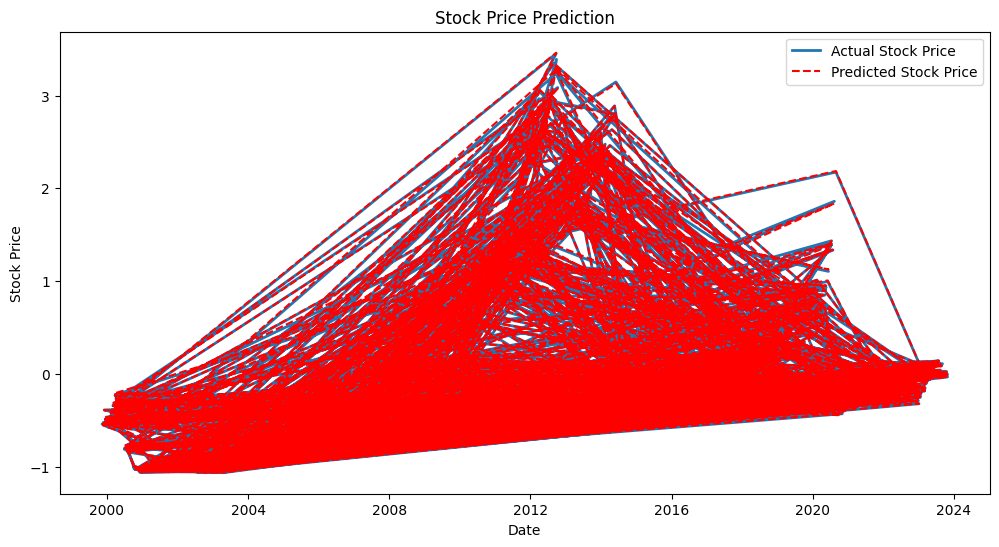

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame 'test_data' that contains your test data
# 'y_test' contains the actual stock prices, and 'y_pred' contains the predicted prices
# You may need to adjust the variables to match your data and predictions.

plt.figure(figsize=(12, 6))
plt.plot(df_y_test.index, y_test, label='Actual Stock Price', linewidth=2)
plt.plot(df_y_test.index, y_pred, label='Predicted Stock Price', linestyle='--', color='red')

plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
